In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
dataset = pd.read_csv('DSL-StrongPasswordData.csv')

## Selection of First 20 Subjects
Only the first 20 sibjects of the benchmark data will be selected for this ML project.

In [4]:
# Get the first 20 subjects 
first_20subject = (dataset.groupby(by='subject', axis=0).count().index[:20])

selected_dataset = dataset[dataset['subject'].isin(first_20subject)]
selected_dataset.head()

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


## Selection of Feature Columns for Visualisation

In [7]:
# Pick all feature column name
feature_col = selected_dataset.columns[3:33]


### a) Key Holding Time Between Subjects

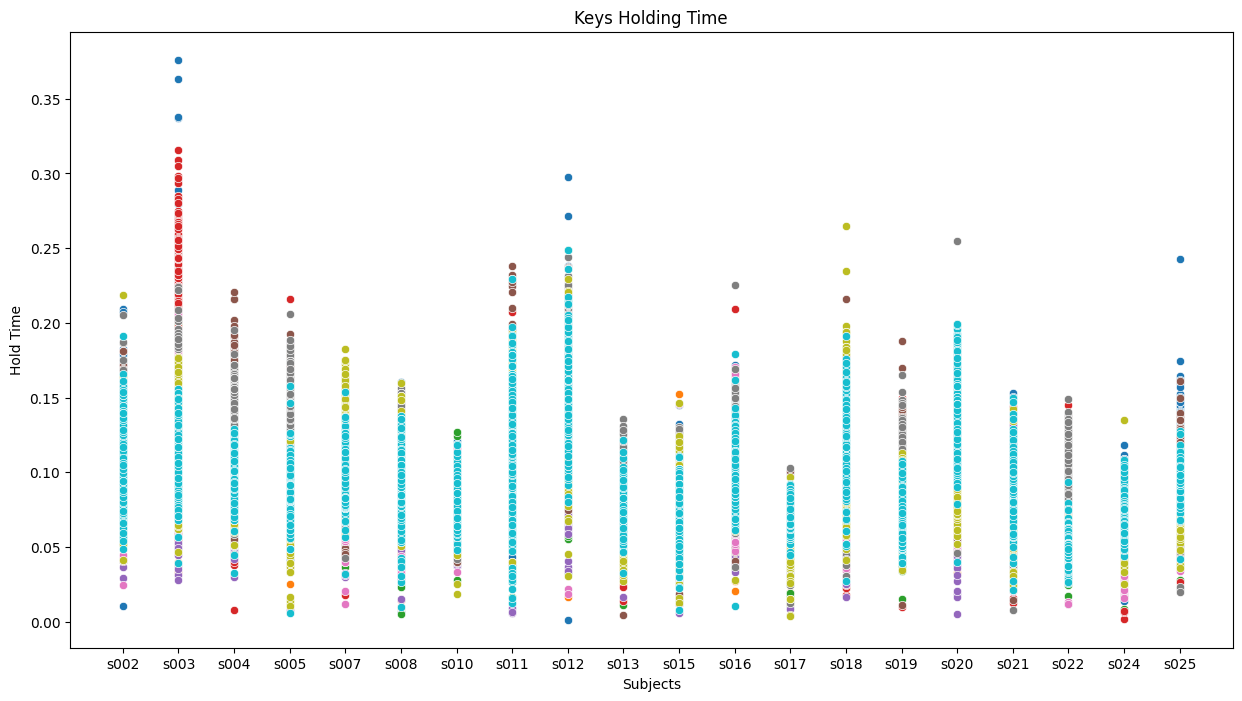

In [63]:
# Select only the hold times
hold_col = [x for x in feature_col if x.startswith('H')]

index = selected_dataset['subject']
hold_dataset = selected_dataset[hold_col]
hold_dataset.index = selected_dataset.subject

# creating subplots to overlay the timings
fig, ax = plt.subplots(figsize=(15,8))

for h in hold_col:
    ax = sns.scatterplot(hold_dataset, x=hold_dataset.index, y=h)
    
ax.set(xlabel="Subjects", ylabel="Hold Time", title='Keys Holding Time')
plt.show()


### b) Key Transfer Time Between Subjects

['UD.period.t', 'UD.t.i', 'UD.i.e', 'UD.e.five', 'UD.five.Shift.r', 'UD.Shift.r.o', 'UD.o.a', 'UD.a.n', 'UD.n.l', 'UD.l.Return']


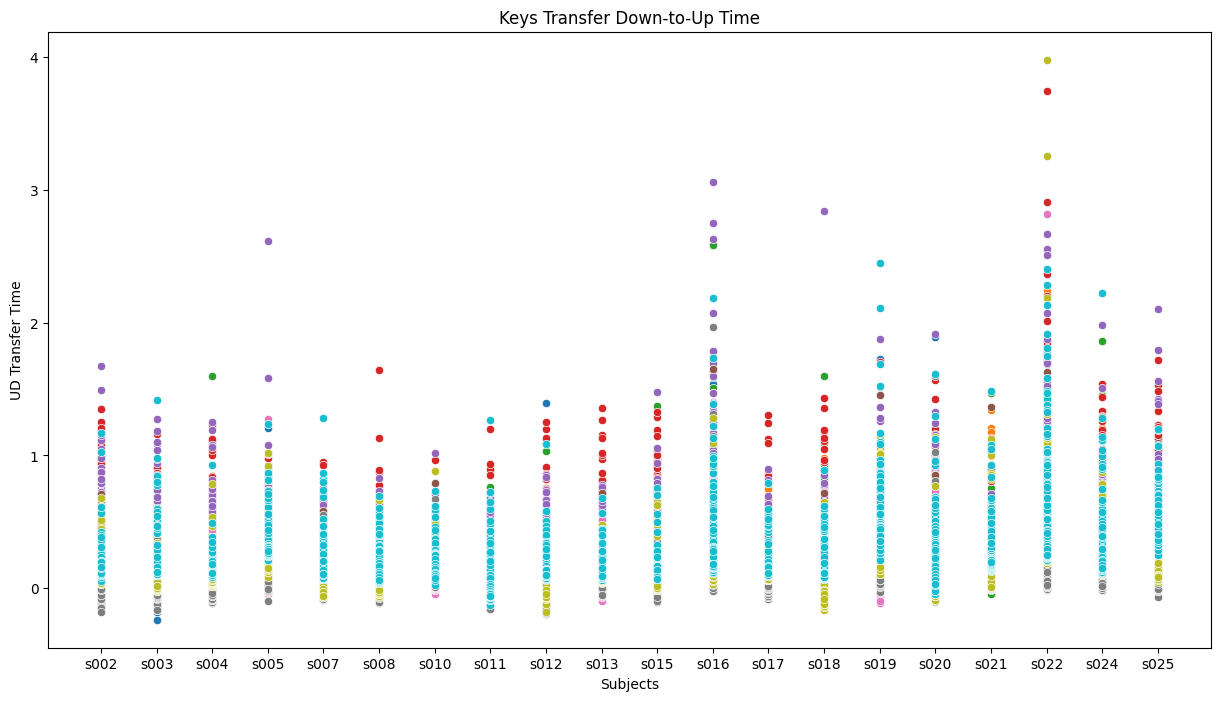

In [62]:
# Select only the UD times
UD_col = [x for x in feature_col if x.startswith('UD')]

print(UD_col)

index = selected_dataset['subject']
UD_dataset = selected_dataset[UD_col]
UD_dataset.index = selected_dataset.subject

# creating subplots to overlay the timings
fig, ax = plt.subplots(figsize=(15,8))

for h in UD_dataset:
    ax = sns.scatterplot(UD_dataset, x=UD_dataset.index, y=h)
    
ax.set(xlabel="Subjects", ylabel="UD Transfer Time", title='Keys Transfer Down-to-Up Time')
plt.show()